In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
ls Datos_Insitu/

PM2.5_1h_2000-2016.xlsx*   ~$PM2.5_1h_2000-2016.xlsx
PM25ALEX.csv               ~$PM25ALEX.xlsx
PM25ALEX.xlsx*


In [15]:
df=pd.read_csv("Datos_Insitu/PM25ALEX.csv")

In [101]:
df.head()

,date,Carvajal,Centro de Alto Rendimiento,Guaymaral,Kennedy,Las Ferias,MinAmbiente,San Cristobal,Suba,Tunal,Usaquen
0,01/01/2008 00:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2008 00:10,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2008 00:20,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2008 00:30,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2008 00:40,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dates=df.date.astype('str')

In [8]:
bli=[i for i,item in enumerate(dates) if "24:00" in item]
gfi=np.in1d(df.index,bli)
dfg=df[gfi]

In [9]:
dfg.head()

,date,Carvajal,Centro de Alto Rendimiento,Guaymaral,Kennedy,Las Ferias,MinAmbiente,San Cristobal,Suba,Tunal,Usaquen
144,01/01/2008 24:00,NaN,NaN,83.4,5.9,NaN,NaN,NaN,NaN,NaN,NaN
288,02/01/2008 24:00,NaN,NaN,87.8,6.6,NaN,NaN,NaN,NaN,NaN,NaN
432,03/01/2008 24:00,NaN,NaN,83.9,9.5,NaN,NaN,NaN,NaN,NaN,NaN
576,04/01/2008 24:00,NaN,NaN,15.2,6.6,NaN,NaN,NaN,NaN,NaN,NaN
720,05/01/2008 24:00,NaN,NaN,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dfti=dfg.mean(axis=0).to_frame()

In [40]:
dfti.columns=["00:00"]

In [41]:
dfti

,00:00
Carvajal,28.657895
Centro de Alto Rendimiento,21.776115
Guaymaral,91.515500
Kennedy,29.618404
Las Ferias,13.902304
MinAmbiente,10.315436
San Cristobal,6.107965
Suba,22.129500
Tunal,15.694280
Usaquen,8.463818


In [45]:
times=[i[-5:] for i in dates[1:bli[0]] ]

In [47]:
for k in times:
    bli=[i for i,item in enumerate(dates) if k in item]
    gfi=np.in1d(df.index,bli)
    dfg=df[gfi]
    dfti[k]=dfg.mean(axis=0).to_frame()

In [54]:
dfbt=dfti.transpose()

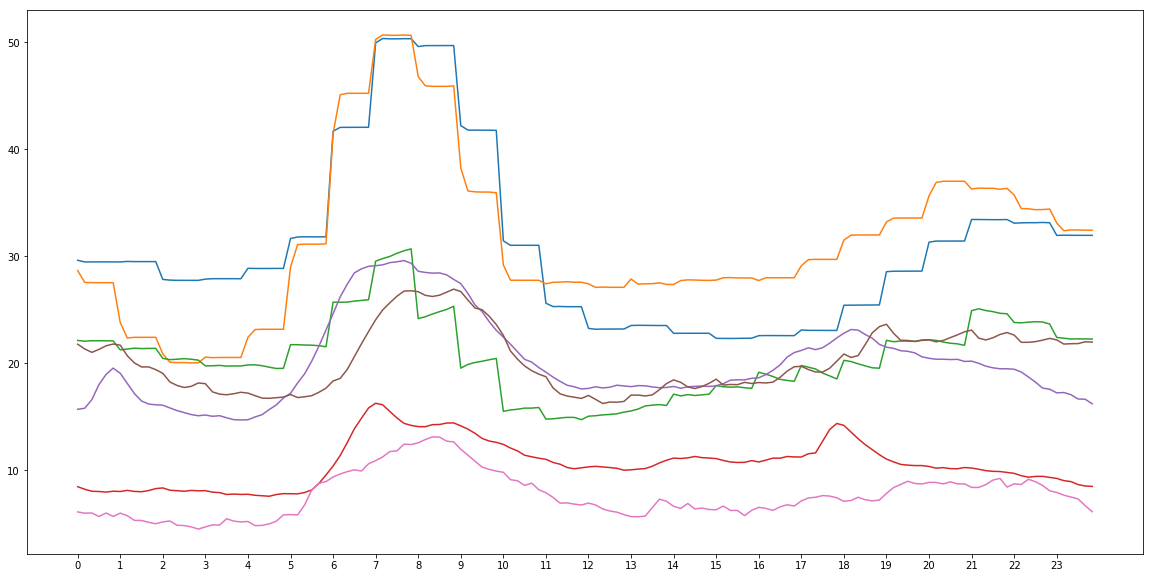

In [103]:
plt.figure(figsize=(20,10))
plt.plot(range(len(dfbt)),dfbt.Kennedy)
plt.plot(range(len(dfbt)),dfbt.Carvajal)
plt.plot(range(len(dfbt)),dfbt.Suba)
plt.plot(range(len(dfbt)),dfbt.Usaquen)
plt.plot(range(len(dfbt)),dfbt.Tunal)
plt.plot(range(len(dfbt)),dfbt['Centro de Alto Rendimiento'])
plt.plot(range(len(dfbt)),dfbt['San Cristobal'])
plt.xticks(range(0,144,6),range(24), fontsize = 10);

In [12]:
gfi=~np.in1d(df.index,bli)

In [7]:
dfg=df[gfi]

In [8]:
gdates=pd.to_datetime(dfg.date)

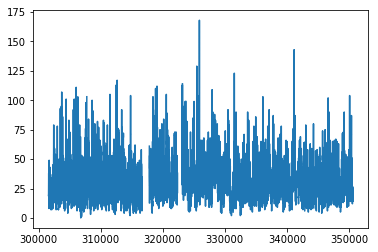

In [15]:
plt.plot(dfg.index,dfg.Carvajal)

In [ ]:
gdates

In [2]:
gdates[0]

NameError: name 'gdates' is not defined